<a href="https://colab.research.google.com/github/MerkulovDaniil/msai22/blob/main/notebooks/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markowitz portfolio exercises
## Problem 1. "Как с деньгами обстоит вопрос? - (What about money? - Russian meme)"
What about real data?

![](https://msai22.fmin.xyz/images/cat_money.jpeg)

In this task you are to select your own set of tickers (for example, you can use [yahoo finance](https://finance.yahoo.com/trending-tickers)). And construct any investment recommendation, based on Markowitz ideas. 

In [4]:
!pip install yfinance --quiet
!pip install pandas_datareader --quiet

1. Select tickers

[*********************100%***********************]  5 of 5 completed


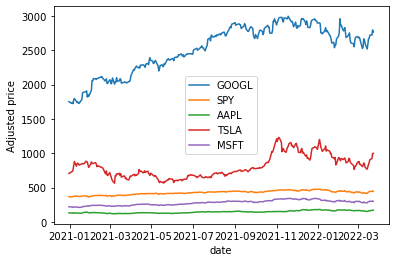

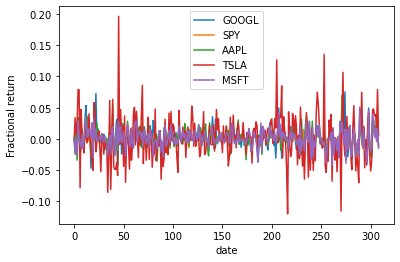

In [7]:
import datetime
import matplotlib.pyplot as plt
import pandas
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

# SELECT YOUR FAVORITE TICKERS HERE
stocks = ['GOOGL', 'SPY', 'AAPL', 'TSLA', 'MSFT']

df = pdr.get_data_yahoo(stocks, start="2021-01-01")

# Adjusted price
for stock in stocks:
    plt.plot(df['Adj Close'][stock], label=stock)
plt.xlabel('date')
plt.ylabel('Adjusted price')
plt.legend()
plt.show()

# Fractional return
frac_return = {}
for stock in stocks:
    frac_return[stock] = [(price - df['Adj Close'][stock][max(i_p-1, 0)])/df['Adj Close'][stock][max(i_p-1, 0)] for i_p, price in enumerate(df['Adj Close'][stock])]
    plt.plot(frac_return[stock], label=stock)
plt.xlabel('date')
plt.ylabel('Fractional return')
plt.legend()
plt.show()

2. Formulate a mathematical problem

YOUR ANSWER HERE

3. Solve the problem somehow and give me an investment recommendation:)

In [8]:
# Calculating mean and covariance of fractional return
# number of stocks
N = len(frac_return)

# number of historical values per stock
M = len(frac_return[stocks[0]])

mu = np.zeros(N)
Sigma = np.zeros((N,N))
Prices = np.zeros((M,N))

for i_asset, (stock, return_array) in enumerate(frac_return.items()):
    mu[i_asset] = np.array(return_array).mean()
    Prices[:, i_asset] = return_array

Sigma = 1/N*(Prices - mu).T @ (Prices - mu)


### YOUR CODE HERE

## EXTRA: [Risk budget allocation](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook_extra_exercises.pdf).

Suppose an amount $x_i>0$ is invested in $n$ assets, labeled $i=1,..., n$,
with asset return covariance matrix $\Sigma \in \mathcal{S}_{++}^n$.
We define the *risk* of the investments as the standard deviation
of the total return, $R(x) = (x^T\Sigma x)^{1/2}$.

We define the (relative) *risk contribution* of asset $i$
(in the portfolio $x$) as
$$
\rho_i = \frac{\partial \log R(x)}{\partial \log x_i} =
\frac{\partial R(x)}{R(x)} \frac{x_i}{\partial x_i}, \quad i=1, \ldots, n.
$$
Why is the logarithm here?! Because it reflects fraction of relative changex (say, per 1%). Take a look at [easticity definition at wiki](https://en.wikipedia.org/wiki/Elasticity_(economics)).
Thus $\rho_i$ gives the fractional increase in risk per fractional increase
in investment $i$.
We can express the risk contributions as
$$
\rho_i = \frac{x_i (\Sigma x)_i} {x^T\Sigma x}, \quad i=1, \ldots, n,
$$
from which we see that $\sum_{i=1}^n \rho_i = 1$.
For general $x$, we can have $\rho_i <0$, which means that a small increase
in investment $i$ decreases the risk.
Desirable investment choices have $\rho_i>0$, in which case we can
interpret $\rho_i$ as the fraction of the total risk contributed by
the investment in asset $i$.
Note that the risk contributions are homogeneous, i.e.,
scaling $x$ by a positive constant does not affect $\rho_i$.

**Problem statement**

In the *risk budget allocation problem*, we are given $\Sigma$ and a
set of desired risk contributions $\rho_i^\mathrm{des}>0$ with
$\bf{1}^T \rho^\mathrm{des}=1$; the goal is to find an investment mix
$x\succ 0$, $\bf{1}^Tx =1$, with these risk contributions.
When $\rho^\mathrm{des} = (1/n)\bf{1}$, the problem is to find an
investment mix that achieves so-called *risk parity*.

### (a)

Explain how to solve the risk budget allocation problem using convex
optimization.

*Hint.*
Minimize $(1/2)x^T\Sigma x - \sum_{i=1}^n \rho_i^\mathrm{des} \log x_i$.

### (b)

Find the investment mix that achieves risk parity for the
return covariance matrix $\Sigma$ below.

In [9]:
import numpy as np
import cvxpy as cp
Sigma = np.array(np.matrix("""6.1  2.9  -0.8  0.1;
                     2.9  4.3  -0.3  0.9;
                    -0.8 -0.3   1.2 -0.7;
                     0.1  0.9  -0.7  2.3"""))
rho = np.ones(4)/4

### YOUR CODE